In [1]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\dev\\statsfaction'

In [2]:
from src.sport_analytics.model.predict import predict_and_explain_players, analyze_individual_ID


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Import your group to analyze

In [3]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE Potential>84 AND FIFA = 2023 and Age < 23 and potential > 83
GROUP BY ID
order by potential DESC;
"""

import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,21.0,239085,E. Haaland,21.0,https://cdn.sofifa.net/players/239/085/23_60.png,Norway,https://cdn.sofifa.net/flags/no.png,88.0,94.0,Manchester City,...,53.0,29.0,7.0,14.0,13.0,11.0,7.0,2023,85.0,44.0
1,21.0,238794,Vinícius Jr.,21.0,https://cdn.sofifa.net/players/238/794/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,86.0,92.0,Real Madrid,...,25.0,18.0,5.0,7.0,7.0,7.0,10.0,2023,79.0,32.0
2,19.0,256630,F. Wirtz,19.0,https://cdn.sofifa.net/players/256/630/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82.0,91.0,Bayer 04 Leverkusen,...,57.0,44.0,14.0,14.0,13.0,6.0,10.0,2023,80.0,55.0
3,19.0,252371,J. Bellingham,19.0,https://cdn.sofifa.net/players/252/371/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,84.0,91.0,Borussia Dortmund,...,78.0,76.0,14.0,11.0,10.0,5.0,8.0,2023,79.0,79.0
4,22.0,246430,D. Vlahović,22.0,https://cdn.sofifa.net/players/246/430/23_60.png,Serbia,https://cdn.sofifa.net/flags/rs.png,84.0,91.0,Juventus,...,26.0,24.0,5.0,15.0,6.0,11.0,10.0,2023,80.0,19.0


## Choose a from a Set of trained models

In [4]:
import pickle

with open("./data/sport_analytics/model/Offense_trained_models.pkl", "rb") as file:
    loaded_object = pickle.load(file)

In [5]:
[i for i in loaded_object]

['Logistic Regression',
 'Decision Tree Classifier',
 'Random Forest Classifier',
 'Support Vector Classifier',
 'XGBoost Classifier',
 'LightGBM Classifier']

In [35]:
chosen_object = loaded_object['Random Forest Classifier']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']

print(chosen_object['Classification Report'])
print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.88      0.82      0.85        51
        True       0.18      0.25      0.21         8

    accuracy                           0.75        59
   macro avg       0.53      0.54      0.53        59
weighted avg       0.78      0.75      0.76        59

0.6629901960784315


# Predict entire Dataset

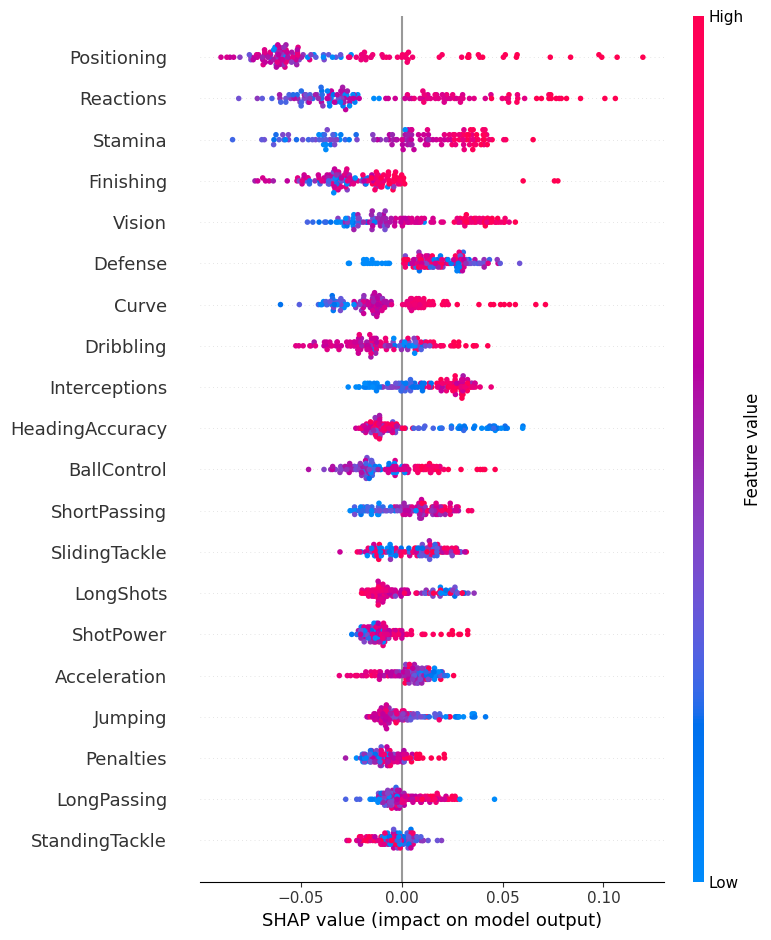

,,,Defense,winger,offense,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,StandingTackle,SlidingTackle,summe_shap,prediction
ID,Name,FIFA,,,,,,,,,,,,,,,,,,,,,
242444,João Félix,2023,-0.324,-3.143,0.0,0.853,1.123,-0.403,0.471,1.940,2.687,1.287,...,0.988,1.132,-0.549,2.433,1.162,0.082,-0.928,0.230,12.924,0.88
238794,Vinícius Jr.,2023,-0.738,0.899,0.0,0.075,3.762,-0.254,1.447,1.767,1.207,0.562,...,0.420,0.015,-0.728,1.500,0.859,0.507,0.220,-0.843,14.738,0.85
241461,Ferran Torres,2023,-0.562,1.820,0.0,0.427,0.949,-0.102,1.318,0.982,0.965,1.708,...,0.148,-0.292,-0.571,3.015,1.911,1.306,0.798,-0.366,13.131,0.84
233049,J. Sancho,2023,-0.460,0.930,0.0,0.238,0.861,0.735,1.187,2.119,2.169,1.656,...,-0.433,0.009,-0.327,1.512,1.587,0.706,0.992,0.768,17.658,0.81
255475,Antony,2023,-0.243,2.246,0.0,0.796,0.764,0.994,1.591,2.188,2.564,-0.593,...,0.046,0.807,-0.880,0.533,1.697,-0.354,0.783,-0.466,18.933,0.81


In [34]:
preds = predict_and_explain_players(df_prospect,attributes=attributes,model=model,scaler=scaler)
preds.head()

# Analyze individual Players

pred 0.2
[(240833, 'Y. Moukoko', 2023)]


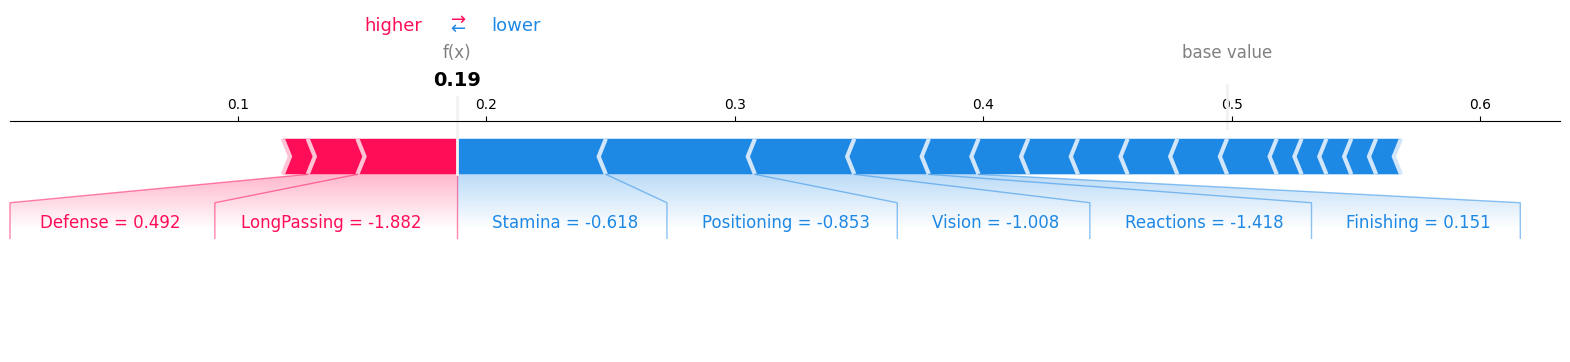

Defense            29.0
winger                0
offense             1.0
Crossing           44.0
Finishing          75.0
HeadingAccuracy    57.0
ShortPassing       64.0
Dribbling          78.0
Curve              68.0
LongPassing        39.0
BallControl        75.0
Acceleration       82.0
SprintSpeed        86.0
Agility            84.0
Composure          66.0
Reactions          62.0
Balance            85.0
ShotPower          65.0
Jumping            71.0
Stamina            64.0
Strength           64.0
LongShots          59.0
Aggression         43.0
Interceptions      29.0
Positioning        67.0
Vision             59.0
Penalties          60.0
StandingTackle     31.0
SlidingTackle      25.0
Name: (240833, Y. Moukoko, 2023), dtype: object


In [29]:
analyze_individual_ID(ID = 240833	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler)